# *KEEPING CUSTOMERS CONNECTED - AND NOT DISCONNECTED!* 
 ## THE SYRIATEL ANALYSIS

# 1.BUSINESS UNDERSTANDING

## **1.1 BUSINESS OVERVIEW**

According to this [article](https://www.sciencedirect.com/topics/social-sciences/telecommunications-industry) published in 2011, Telecommunications company is an organization that provides services for long distance communication. They do this by building and mainatining  the physical networks, like cell towers, that transmit signals to individuals and businesses.These companies facilitate essential services like accessing the internet, making phone calls and sending messages. They make money through customer subscriptions and usage fees for these services.SyriaTel is a telecom company that provides call,text and data services to customers. 
One advantage of working with in the telecommunication sector is that it is a high-performing sector that contributes to economic growth, potentially increasing returns for investors. Telecommunication is also an essential service with steady demand, making it stable and a valuable industry to be part of.
However, the telecom industry is highly competitive and customers can easily switch to other providers if they're dissatisfied. This creates a high risk of customer churn, which can reduce revenue and can discourage investor confidence if not properly managed.

<img src="telecomm.webp" alt="Telecomm " width="600">





## **1.2 PROBLEM STATEMENT**
SyriaTel is losing customers to competitors, by analysing customer data, we can predict churn and uncover the reasons why customers leave, so SyriaTel can take action to reduce churn and improve customer retention.

This is costly because:

*Revenue loss:* Each customer lost means recurring revenue lost.

*High acquisition cost:* It is more expensive to acquire a new customer than to retain an exsisting one.

*Competitive pressure:* In a competetive market, reducing churn is critical for survival and growth.

If we can predict which customers are likely to leave, SyriaTel can take action early eg. giving offers, improving services,or solving problems to make those customers stay.

So the goal is to reduce churn and keep loyal customers.


## **1.3 BUSINESS OBJECTIVES**

 ## 1.3.1 *Main objective:*
To create a succesful binary classification model that predicts customers likelihood to churn.


 ## 1.3.2 *Specific objectives:*

1. To develop a model that predicts whether a customer will churn or stay.
2. To predict customer churn and provide insights that help SyriaTel keep its customers and reduce revenue loss.
3. To identify the key factors eg. call charges, service quality or customer complaints that influence the probability of a customer to churn or not to churn.
4. To provide insights that SyriaTel can use to design strategies for reducing churn and improving customer satisfaction.
5. To determine the state with the highest churning rate.



 ## 1.3.3*Research questions*
1. What is the best performing binary classification to use for prediction?
2. Can we accurately predict which syriaTel customers are likely to churn using their demographic and usage data?
3. What are the main factors that influence customer churn?
4. How can SyriaTel use the model's prediction and insights to design strategies that reduce churn and retain more customers?
5. What is the state with the highest churning rate?

## **1.4 SUCCESS CRITERIA**

 ***Model performance***
 
The churn prediction model achieves a good level of balance between recall and ROC-AUC score inorder to correctly identifying customers who churn.
 
 ***Insights gained***
 
The analysis clearly identifies the key factors that contribute to churn eg. high call charges and frequent complains.
 
 ***Business value***
 
SyriaTel can use the model's results to take practical actions, such as designing loyalty offers or improving customer service which can help improve customer churn.


# 2. DATA UNDERSTANDING
The Syria Tel customer churn dataset we are working with is from [Kaggle](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).Our data is on Syria Tel which is a telecommunication company, it had a total of 21 columns and 3333 rows. Below are the descriptions of the columns:

1.	`state` – U.S. state where the customer lives.

2.	`account length` – Number of days the customer has had the account.

3.	`area code` – Telephone area code.

4.	`phone number` – Customer’s phone number.

5.	`international plan` – Whether the customer has an international calling plan (yes/no).

6.	`voice mail plan`– Whether the customer has a voicemail plan (yes/no).

7.	`number vmail messages` – Number of voicemail messages the customer has.

8.	`total day minutes` – Total minutes of calls during the day.

9.	`total day calls` – Number of calls during the day.

10.	`total day charge` – Total charges for day calls.

11.	`total eve minutes` – Total minutes of calls during the evening.

12.	`total eve calls` – Number of calls during the evening.

13.	`total eve charge` – Total charges for evening calls.

14.	`total night minutes` – Total minutes of calls during the night.

15.	`total night calls` – Number of calls during the night.

16.	`total night charge` – Total charges for night calls.

17.	`total intl minutes` – Total minutes of international calls.

18.	`total intl calls` – Number of international calls.

19.	`total intl charge` – Total charges for international calls.

20.	`customer service calls` – Number of calls made to customer service.

21.	`churn`– Target variable: whether the customer left the company (True = churned, False = stayed).

After data cleaning we decided to work with the coloumns below: where `churn` is our dependent varaible.
    
`state` – U.S. state where the customer lives.
    
`account length `– Number of days the customer has had the account.
    
`area code` – Telephone area code.
    
`phone number` – Customer’s phone number (serves as an identifier, not useful for prediction).
    
`international plan`– Whether the customer has an international calling plan (yes/no).
    
`log_vmail_messages` – Number of voicemail messages the customer has.
    
`customer service calls` – Number of calls made to customer service.
    
**`churn`** – Whether the customer left the company (True = churned, False = stayed). which is our dependent variable**
    
`total_calls` - The total number of calls.
    
`total_minutes` - The total number number of minutes for all calls.
    
`total_charge` - The total charges for all calls.

     
We are merging the columns `total day minutes` ,`total eve minutes` and `total night minutes` into one column named `total_minutes`. We are also merging `total day calls` , `total eve calls` and `total night calls` into one column named `total_calls`. The columns `total day charge`, `total eve charge`,  and`total night charge` are also being merged to become one column called `total_charge`.



# 3. DATA EXPLORATION

## 3.1 Loading a dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [2]:
df = pd.read_csv("Syria_Tel.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 21)

Our dataset has *3333* rows and *21* columns .

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## 3.2 Data cleaning

Let's check for any missing values in our dataset.

In [5]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Since our dataset doesn't have any missing values we don't have to drop any null or fill for missing values.

Let's drop the `phone number` column since it is not useful in our prediction.

In [6]:
#dropping a column
df = df.drop(columns =['phone number'])


In [7]:
df.shape

(3333, 20)

We need to check for categorical data in our dataset so that we can perform **one hot encoding** which is an important step for us to make predictions and create Machine learning models.

In [8]:
#checking for categorical values
categorical_cols = df.select_dtypes(include=["object"]).columns
print(categorical_cols)


Index(['state', 'international plan', 'voice mail plan'], dtype='object')


`state`, `international plan` and `voice mail plan` are the columns that are categorical and we need to perfom one hot encoding on 

In [9]:
df["international plan"].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

In [10]:
df["voice mail plan"].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

In [11]:
# One-hot encode both binary categorical columns
df_encoded = pd.get_dummies(df,columns=["international plan", "voice mail plan"],drop_first=True,dtype=int)
df_encoded.head()



,state,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
0,KS,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,1
1,OH,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,1
2,NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,0
3,OH,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,1,0
4,OK,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,1,0


Encoding `state` into 50 dummy columns might not be the recommended way to go about it because it will make it harder for the model to interpret and cause **multicollinearity**, So for this `state` column we took a different approach.

In [12]:
df_encoded["state"].value_counts().head(7)

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
Name: count, dtype: int64

In [13]:
df_encoded["churn"].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

For uniformity i wanna change the contents of this columns to 0 and 1 to match the new encoded columns.

In [14]:
#convert entries
df_encoded["churn"] = df_encoded["churn"].map({True: 1, False: 0})


In [15]:
df_encoded["churn"].unique()

array([0, 1])

Let's check for class imbalance in our dependent variable `churn`

In [16]:
df_encoded["churn"].value_counts(normalize = True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

There is clearly a class imbalance on this column with **85.5%** of the data going to 0 (stay) while the other **14.49%** going to churn and this might not give a correct representation of our model prediction.

Let's check for feature distributions and decide whether to perform log transformation or other normalizations before modelling.

In [17]:
df_encoded.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,0.096910,0.276628
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,0.295879,0.447398
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,0.000000,1.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000,1.000000


Every other column seems to have a n even distribution or little to know skewness.But let's take a look at `number vmail messages` whose most customers have 0 messages but some have upto 51 messages.

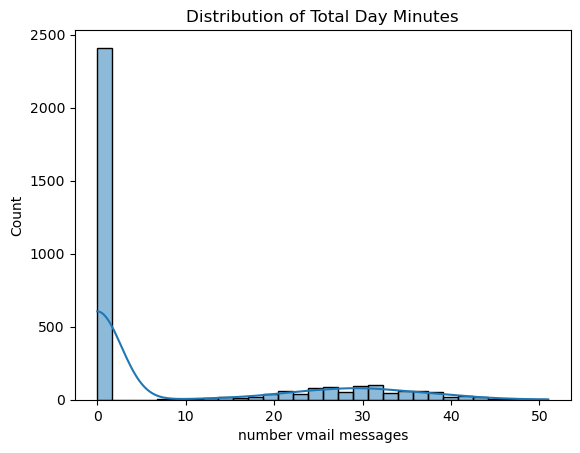

In [18]:
sns.histplot(df_encoded["number vmail messages"], kde=True, bins=30)
plt.title("Distribution of Total Day Minutes")
plt.show()

In [19]:
df_encoded["log_vmail_messages"] = np.log1p(df_encoded["number vmail messages"])

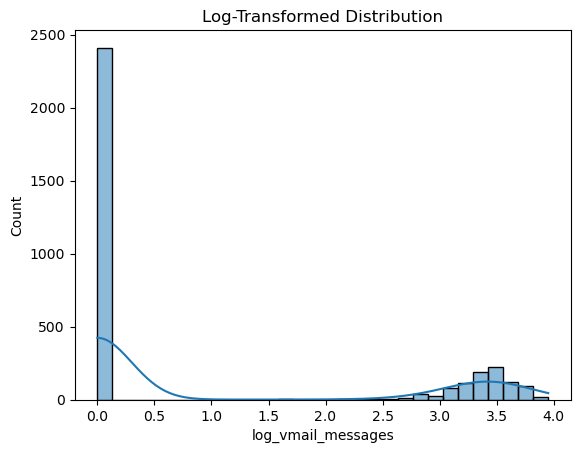

In [20]:
sns.histplot(df_encoded["log_vmail_messages"], kde=True, bins=30)
plt.title("Log-Transformed Distribution")
plt.show()

 # 3.4 Feature engineering

Let's check how different columns correlate with each other before we decide on what features to use so we need to conduct feature engineering on the columns.

In [21]:
#let's check for multicollinearity
corr = df_encoded.corr(numeric_only = True)

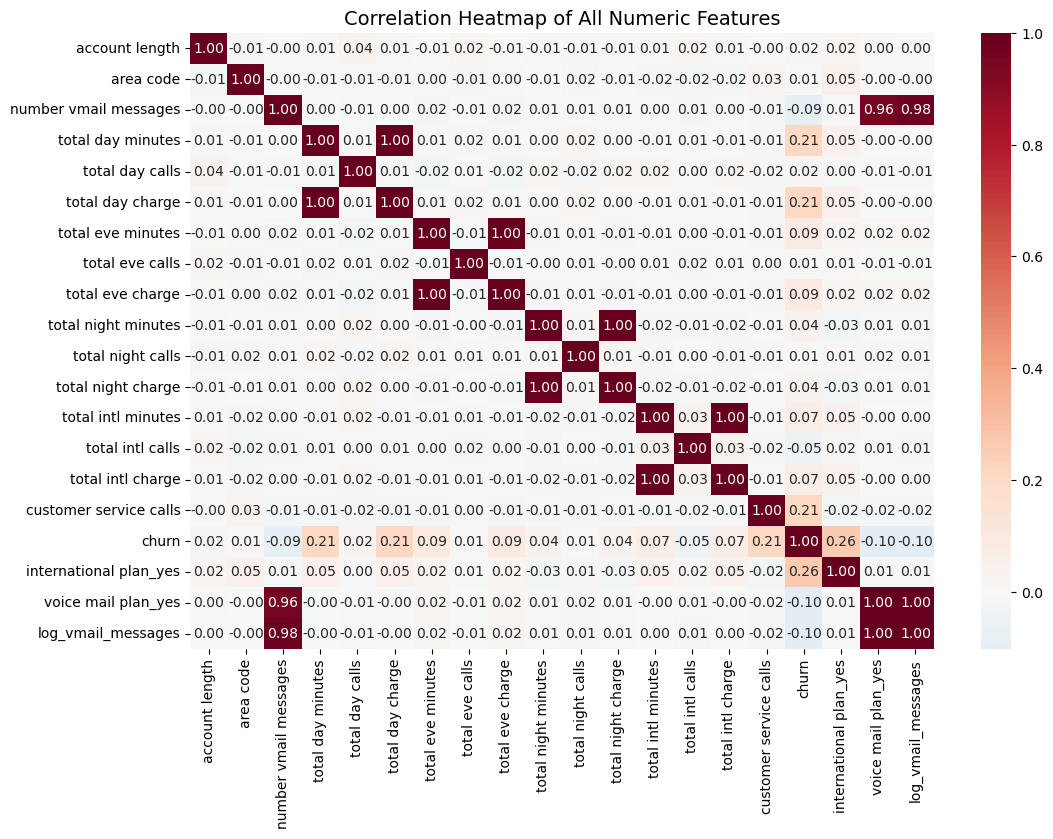

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0, cbar=True)
plt.title("Correlation Heatmap of All Numeric Features",fontsize = 14)
plt.show()


Some of this features are highly correlated and give the same insights for example `total day minutes`,`total eve minutes`and `total night minutes` can be put together to give us `total_minutes` that are used in a 24hrs.This will be similarly be applied to `total_calls` and `total_charge`.

In [23]:
df_encoded["total_minutes"] = df_encoded["total day minutes"] + df_encoded["total eve minutes"] + df_encoded["total night minutes"]
df_encoded["total_calls"] = df_encoded["total day calls"] + df_encoded["total eve calls"] + df_encoded["total night calls"] 
df_encoded["total_charge"] = df_encoded["total day charge"] + df_encoded["total eve charge"] + df_encoded["total night charge"] 



In [24]:
cols_to_drop =["total day minutes", "total eve minutes", "total night minutes", "total day calls", "total eve calls", "total night calls",
    "total day charge", "total eve charge", "total night charge"]

In [25]:
df_encoded = df_encoded.drop(columns = cols_to_drop)

Since `voice mail plan_yes` and `number vmails messages` carry essentially the same info and have a high correlation of **0.96**.Let's drop the column `voive mail plan_yes` because one can't sent or recieve any voice mails without a plan.

In [26]:
df_encoded = df_encoded.drop(columns = ["voice mail plan_yes"])

In [27]:
#cleaned dataframe
df_encoded.head()

,state,account length,area code,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,log_vmail_messages,total_minutes,total_calls,total_charge
0,KS,128,415,25,10.0,3,2.70,1,0,0,3.258097,707.2,300,72.86
1,OH,107,415,26,13.7,3,3.70,1,0,0,3.295837,611.5,329,55.54
2,NJ,137,415,0,12.2,5,3.29,0,0,0,0.000000,527.2,328,59.00
3,OH,84,408,0,6.6,7,1.78,2,0,1,0.000000,558.2,248,65.02
4,OK,75,415,0,10.1,3,2.73,3,0,1,0.000000,501.9,356,49.36


# 4. EXPLANATORY DATA ANALYSIS

Let's do a bit of explanatory data analysis before we move to building our models.

#### Determing the churning rate
Limit beyond which we will be using to determine the rate at which they all contribute to churning

In [29]:
df = df_encoded.copy()
df['churn_num'] = df['churn'].astype(int)

# identifying the baseline for churning
baseline = df['churn_num'].mean()
print(f"Baseline churn rate: {baseline:.2%}  (n={len(df)})")

# categorical signals risk ratios
def churn_rate_by(cat):
    out = (df.groupby(cat)['churn_num']
             .agg(['mean','count'])
             .rename(columns={'mean':'churn_rate','count':'n'})
             .sort_values('churn_rate', ascending=False))
    return out

def risk_ratio(cat, positive_value):
    # RR = churn_rate(positive) / churn_rate(negative)
    a = df.loc[df[cat]==positive_value, 'churn_num'].mean()
    b = df.loc[df[cat]!=positive_value, 'churn_num'].mean()
    return a/b if b>0 else np.nan


Baseline churn rate: 14.49%  (n=3333)


## 4.1 Churn by customer service calls

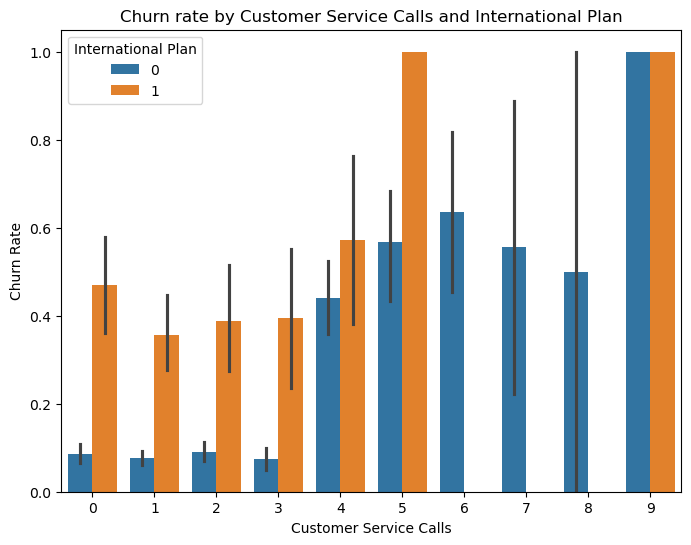

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=df,
    x="customer service calls",
    y="churn_num",
    hue="international plan_yes",
    estimator="mean"
)
plt.title("Churn rate by Customer Service Calls and International Plan")
plt.ylabel("Churn Rate")
plt.xlabel("Customer Service Calls")
plt.legend(title="International Plan")
plt.show()

Customers with 0–2 service calls and no international plan have very low churn (~5–10%). That’s the “safe” group.
For customer service calls: As customer service calls increase, churn rate rises steeply. from 4+ calls, churn risk accelerates from 40 to 60%. By 5–9 calls, churn is extremely high about over 70 to 100%. This indicates frequent service issues are a major churn driver.
For international plan: Across almost all service call counts, customers with an international plan churn at a much higher rate than those without.for instance, at 0 calls, churn with an international plan is already ~45% vs ~8% without. At 4–5 calls, international plan customers approach 100% churn. This suggests dissatisfaction with the international plan (pricing, quality, or billing surprises). 

This shows that generally, having both many service calls + international plan is the worst combination: churn rate goes almost to 100%. So the two risk factors are independent and they compound each other.
What this means is high service call volume is a red flag and these customers need immediate intervention. International plan holders are disproportionately at risk even with few service calls therefore product or pricing review is urgent. Customers with both issues (international plan + frequent service calls) are the highest-priority retention segment.

## 4.2 hurn rate by state

/tmp/ipykernel_5302/1350308318.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_churn.index, y=state_churn.values, palette="viridis")


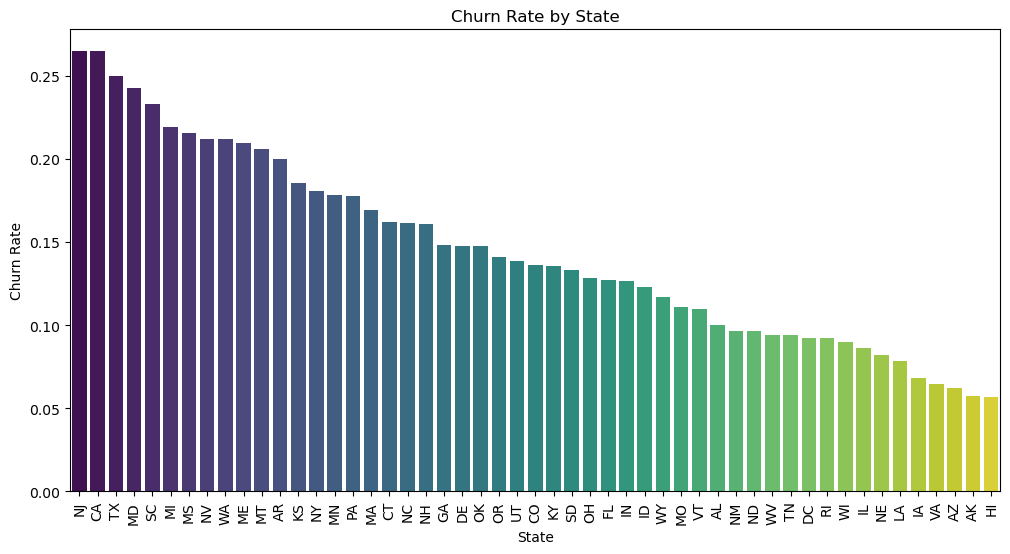

In [32]:
# Determining how states contribute to churning 
# Churn rate per state
state_churn = df.groupby("state")["churn"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=state_churn.index, y=state_churn.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Churn Rate by State")
plt.ylabel("Churn Rate")
plt.xlabel("State")
plt.show()

New Jersey (NJ): Out of 68 customers, 18 churned giving a 26.5% churn rate.

California (CA): Out of 34 customers, 9 churned giving a 26.5% churn rate.

Texas (TX): Out of 72 customers, 18 churned this is a 25% churn rate.

Maryland (MD): Out of 70 customers, 17 churned which is a 24.3% churn rate.

South Carolina (SC): Out of 60 customers, 14 churned equal to 23.3% churn rate.

Hawaii (HI): Out of 53 customers, only 3 churned equal to 5.7% churn rate.

Alaska (AK): Out of 52 customers, 3 churned which is 5.8% churn rate.

Arizona (AZ): Out of 64 customers, 4 churned adds upto 6.3% churn rate.

Virginia (VA): Out of 77 customers, 5 churned equals to 6.5% churn rate.

Iowa (IA): Out of 44 customers, 3 churned equals to 6.8% churn rate.

## 4.3 Feature Importance
Below is a random forest for predicting the churn. It will help us with plotting the future importance. This tells management why those groups churn, so interventions can be justified.

/tmp/ipykernel_5302/1440616969.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(20), x='importance', y='feature', palette='viridis')


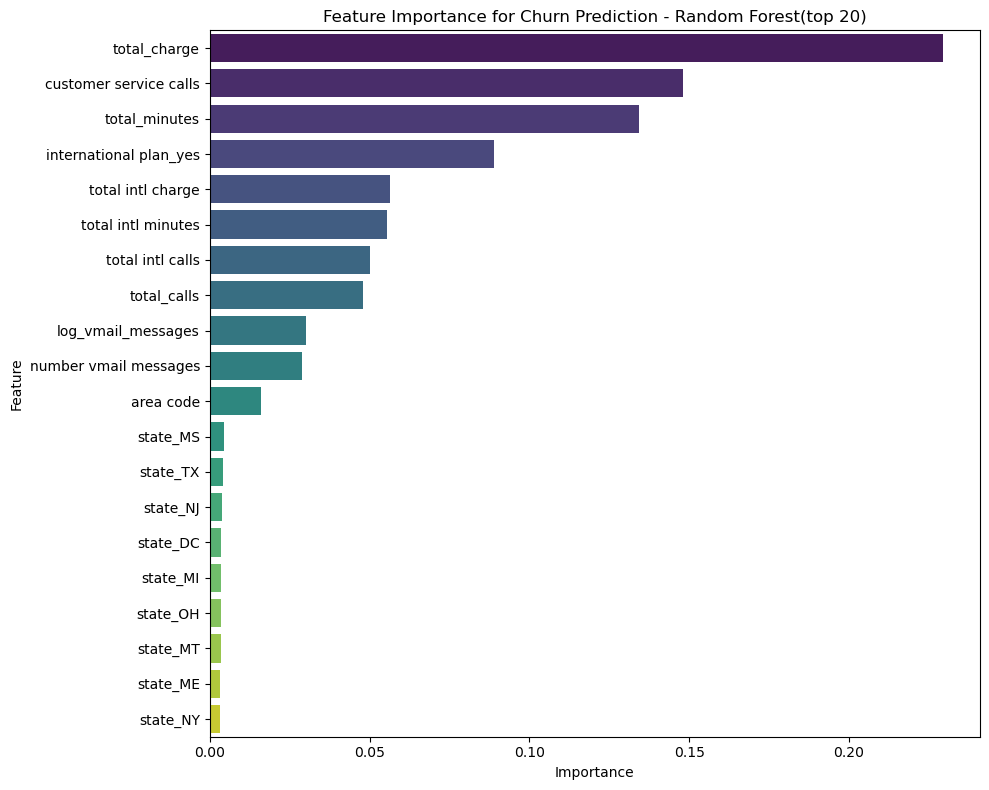

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
# Copy dataset and prepare features
X = df.drop(columns=['churn','churn_num','account length'])
y = df['churn_num']

# Method 1: Using pandas get_dummies (Simplest and most reliable)
X_processed = pd.get_dummies(X, drop_first=True)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_processed, y)

# Feature importance
importances = pd.DataFrame({
    'feature': X_processed.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=importances.head(20), x='importance', y='feature', palette='viridis')
plt.title("Feature Importance for Churn Prediction - Random Forest(top 20)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Customer service performance is the strongest churn signal - improving this can directly reduce churn.

High-usage customers (especially daytime callers) are at risk - need targeted retention offers.

International plan users are sensitive - better international packages could keep them loyal.

Voicemail and state-level differences don’t matter much - no need to allocate marketing budget here.

# 5. MODELLING

## 5.1 BASELINE MODEL

### 5.1.1 LOGISTIC REGRESSION

Let's move to creating models,specifically a logistic regression model because the problem we are trying to answer is a binary classification and we are also trying to answer the question **what is the probability of a customer to churn or not to churn?** depending on various features.

Before moving to the modelling bit of things we first have to do **feature selection** and also look at our predictor variable `churn`, So as to create our baseline model.

In [84]:
df_encoded['churn'].value_counts(normalize =True)*100

churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64

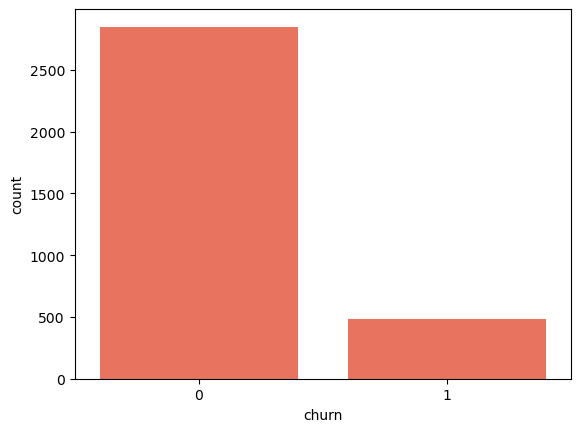

In [85]:
sns.countplot(x="churn", data=df_encoded,color ="tomato")
plt.show()

As you can see from the above visual,the target variable is highly imbalanced.The class 0 has a percentage of **85.5%** while our class 1 has **14.49%** .It shows that 85% of the customers stayed while 14.49% churned which we must address during model training to avoid biased predictions.

Since `churn` is binary we can compute **Pearson correlation** between churn and other features before doing Logistic regression. 

In [86]:
# Only keep numeric columns
numeric_df = df_encoded.select_dtypes(include=[np.number])

# Correlation with churn
churn_corr = numeric_df.corr()["churn"].sort_values(ascending=False)
print(churn_corr)


churn                     1.000000
international plan_yes    0.259852
total_charge              0.226962
customer service calls    0.208750
total_minutes             0.196457
total intl charge         0.068259
total intl minutes        0.068239
total_calls               0.019651
account length            0.016541
area code                 0.006174
total intl calls         -0.052844
number vmail messages    -0.089728
log_vmail_messages       -0.098991
Name: churn, dtype: float64


Let's visualize this correlation to `churn` column which is our dependent feature.

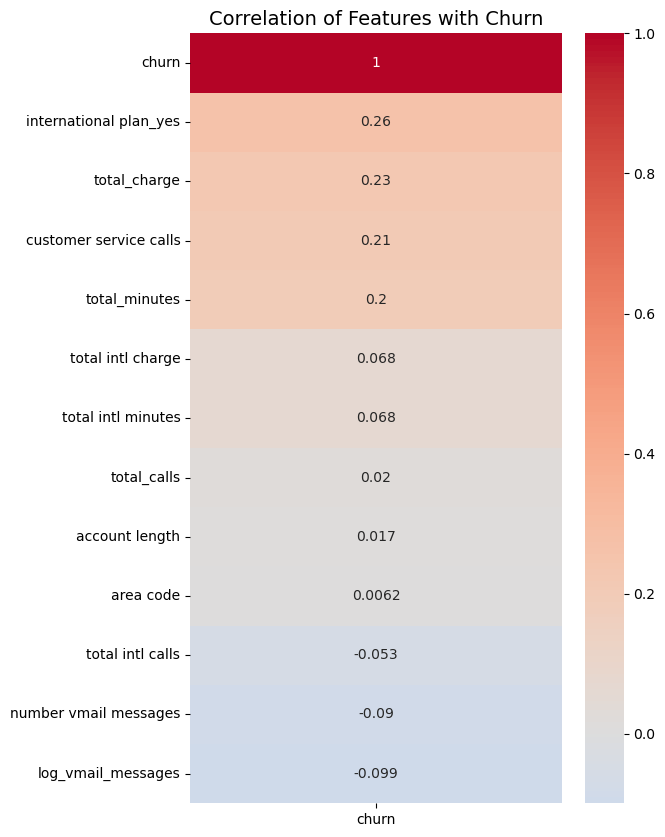

In [87]:
#convert to Dataframe for heatmap
churn_corr_df = churn_corr.to_frame()
#plot heatmap
plt.figure(figsize=(6,10))
sns.heatmap(churn_corr_df, annot=True, cmap="coolwarm", center=0, cbar=True)
plt.title("Correlation of Features with Churn", fontsize=14)
plt.show()

We will be using Positive correlation features because they tell us who is likely to churn while Negaative correlation features tell us who is likely to stay.

In [88]:
#sklearn model import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report,roc_curve

In [89]:
#top 4 positive correlatrion with churn
selected_features =["international plan_yes","total_charge" ,"customer service calls" ,"total_minutes"]           

In [90]:
#independent and dependent variables
X = df_encoded[["international plan_yes","total_charge","customer service calls" ,"total_minutes"]]          
y = df_encoded["churn"]

In [92]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y) #stratify=y ensures the churn ration is preserved in both train and test
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
#fit the model
log_reg.fit(X_train, y_train)
#let's predict
y_pred_base = log_reg.predict(X_test)
y_proba_base = log_reg.predict_proba(X_test)[:, 1]  # probability of churn (class 1)


## 5.2 LOGISTIC REGRESSION WITH ALL FEATURES.

We want to check whether adding more information improves the model compared to the baseline.For features we are using all the predictores available in the dataset excluding the target variable. We'll first onehotencode the multi-categorical variable state to have a smooth flow.

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score


Let's split and train our model.

In [100]:
# Separate features and target
X = df_encoded.drop("churn", axis=1)
y = df_encoded["churn"]

# Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)


We will have to **OneHotEncode** our multi-categorical variable after conducting a split so that it ensures encoding happens after splitting, with no leakage.

In [101]:
#encode state 
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Fit on train, transform both train & test
X_train_state = encoder.fit_transform(X_train[["state"]])
X_test_state = encoder.transform(X_test[["state"]])

Now scale the the numeric features after encoding `state`

In [102]:
# all numeric features
numeric_features = ['account length', 'area code', 'number vmail messages',
       'total intl minutes', 'total intl calls', 'total intl charge','log_vmail_messages',
       'customer service calls', 'international plan_yes','total_minutes',
       'total_calls', 'total_charge']

In [103]:
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

In [105]:
#combine encoded vs numeric 
X_train_final = np.hstack([X_train_state, X_train_num])
X_test_final = np.hstack([X_test_state, X_test_num])

#fit the model
model = LogisticRegression(max_iter=1000, random_state=42,class_weight="balanced")
model.fit(X_train_final, y_train)

y_pred_log = model.predict(X_test_final)
y_proba_log = model.predict_proba(X_test_final)[:,1]

## 5.3 DECISIONTREE CLASSIFIER

Let's build another model to perform classification ,in this case a DecisionTree Classifier .

In [109]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df_encoded["state_encoded"] = enc.fit_transform(df_encoded[["state"]])


In [110]:
df_encoded = df_encoded.drop(["state"],axis=1)
df_encoded.head()

,account length,area code,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,log_vmail_messages,total_minutes,total_calls,total_charge,state_encoded
0,128,415,25,10.0,3,2.70,1,0,0,3.258097,707.2,300,72.86,16.0
1,107,415,26,13.7,3,3.70,1,0,0,3.295837,611.5,329,55.54,35.0
2,137,415,0,12.2,5,3.29,0,0,0,0.000000,527.2,328,59.00,31.0
3,84,408,0,6.6,7,1.78,2,0,1,0.000000,558.2,248,65.02,35.0
4,75,415,0,10.1,3,2.73,3,0,1,0.000000,501.9,356,49.36,36.0


In [111]:
X = df_encoded.drop(columns=["churn"])
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the model
dt_temp = DecisionTreeClassifier(random_state=42, class_weight="balanced")
path = dt_temp.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [118]:
# parameter grid
param_grid = {
    "max_depth": [3, 5, 7, 10,],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],
    "ccp_alpha": ccp_alphas 
}
dt = DecisionTreeClassifier(random_state=42,class_weight ="balanced")
#GridSearchCV will try different tree depths, splits, and leaf sizes, then pick the best configuration.
grid_search = GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,scoring="recall",n_jobs=-1)

# Run grid search on training set
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
y_pred_dt = grid_search.predict(X_test)
y_proba_dt = grid_search.predict_proba(X_test)[:, 1]

Best Parameters: {'ccp_alpha': 0.0822770800193284, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


## 5.3 RANDOM FOREST MODEL 

we will advance to use Random forest model to build another model.

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
# churn = target variable

X = df_encoded.drop("churn", axis=1)
y = df_encoded["churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [130]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
#
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="recall",   # optimize for recall
    cv=5,
    n_jobs=-1,
    refit=True          # refits the best model on the whole training set
)
#fit grid search
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [131]:
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]


# 6.EVALUATION

In this section we will be evaluating our models to determine which performs better at predicting churning customers. We will compare the models and ultimately choose the one that performs better as our baseline model of recommendation.Let's begin.

We will be using Recall and ROC-AUC as the metric of success of our model.we will be using:

**Recall** 
*  Recall measures how many actual churners the model correctly identifies.
*  In churn prediction, missing a churner is costly, because it means losing a customer and revenue.
*  By optimizing high recall, we ensure the model captures most at-risk customers, even if it occasionally flags a few non-churners.

**ROC-AUC**
* measures the model’s ability to discriminate between churners and non-churners across all thresholds.
* ROC-AUC is threshold-independent, so it evaluates the model’s overall ranking ability.
* A high ROC-AUC means the model is reliable in assigning higher churn probabilities to churners than to non-churners, which is critical for making informed business decisions.

Togther they align with our business objectives and the problem we are tyrying to solve.

## 6.1 Logistic regression baseline model

We start with our basemodel logistic with 4 features

In [93]:
y_train_pred = log_reg.predict(X_train)
y_train_proba = log_reg.predict_proba(X_train)[:, 1]

# Test predictions
y_test_pred = log_reg.predict(X_test)
y_test_proba = log_reg.predict_proba(X_test)[:, 1]

# Compute metrics
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train ROC-AUC:", roc_auc_score(y_train, y_train_proba))
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_proba))

Train Accuracy: 0.7700675168792198
Test Accuracy: 0.7616191904047976
Train ROC-AUC: 0.815667893827834
Test ROC-AUC: 0.8076143968167843


Our logistic regression with 4 features does not show strong signs of overfitting. The performance is slightly better on the training set but performs close enough to the test set data suggesting good generalization.

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

**Accuracy score:**

We have an accuracy score of 76% which means about 76% of predictions are correct.But because the dataset is imbalanced accuracy alone is misleading.

**recall:**

The model correctly identifies 75% of true churners meaning the model is good at catching churners even though it misses about 25%.

**Precision :**

Out of all the customers predicted as churners, only 35% actually churn meaning it gives a high number of false positives.It therefore predicts churn when the customer stays.

This model is better at finding churners (high recall) than being precise about them (low precision).
This means:

We will catch most customers who are likely to churn,but also flag many who wouldn’t have churned (false alarms).


Let's visualize our ROC-AUC for more understanding of our model.

<Figure size 800x600 with 0 Axes>

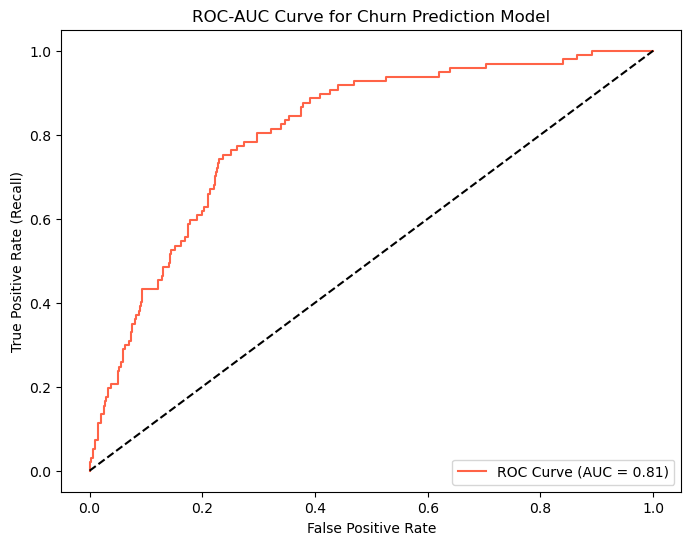

In [95]:
# Compute ROC curve
fpr_base, tpr_base, thresholds = roc_curve(y_test, y_proba_base)

# Compute AUC
roc_auc_base = roc_auc_score(y_test, y_proba_base)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_base, tpr_base, label=f"ROC Curve (AUC = {roc_auc_base:.2f})", color="tomato")
plt.plot([0,1], [0,1], linestyle="--", color="black")  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC-AUC Curve for Churn Prediction Model")
plt.legend(loc="lower right")
plt.show()

Our ROC curve lies well above the diagonal, meaning the model does a good job distinguishing churners from non-churners.It has an AUC = 0.81 which is good and shows a that our model is highly predictive but has room for growth.

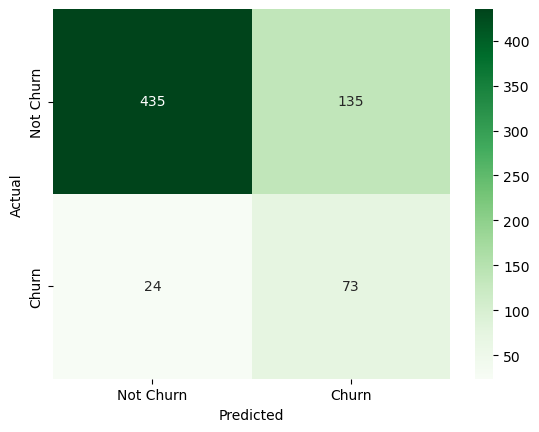

In [96]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Not Churn", "Churn"],
            yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Top-left cell: customers correctly predicted as “stay”(True positive).

Bottom-right cell: customers correctly predicted as “churn”(True negative).

Top-right cell: customers predicted to churn but actually stayed (false positives).

Bottom-left cell: customers predicted to stay but actually churned (false negatives).

**7.1.2 Feature importance**

In [97]:
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(feature_importance)

                  Feature  Coefficient
0  international plan_yes     2.334522
2  customer service calls     0.623310
1            total_charge     0.079435
3           total_minutes    -0.000756


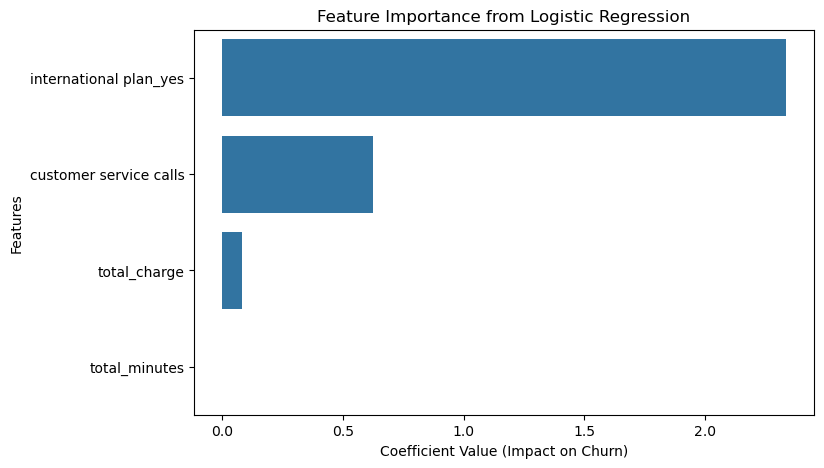

In [98]:
plt.figure(figsize=(8,5))

# Horizontal bar plot
sns.barplot(data =feature_importance,x="Coefficient",y="Feature")
plt.title("Feature Importance from Logistic Regression")
plt.xlabel("Coefficient Value (Impact on Churn)")
plt.ylabel("Features")
plt.show()


**Impact on churn**

Let's look at how the features of our baseline model affect churn.

`international plan_yes`(2.33): Customers with an international plan are much more likely to churn.

`customer service calls`(0.62): The more times a customer calls customer service, the higher the chance they churn.

`total_charge` (0.079): As charges increase, churn likelihood slightly increases.weak effect

`total_minutes`(-0.0007) :Customers who use more minutes are slightly less likely to churn

## 6.2 Logistic regression  model with all features

Let's first start by checking for **overfitting** in our model since we have used all features.

In [106]:
# Train predictions
y_train_pred = model.predict(X_train_final)
y_train_prob = model.predict_proba(X_train_final)[:,1]

# Test predictions
y_test_pred = model.predict(X_test_final)
y_test_prob = model.predict_proba(X_test_final)[:,1]

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("Train ROC-AUC:", roc_auc_score(y_train, y_train_prob))
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_prob))

Train Accuracy: 0.7786946736684172
Test Accuracy: 0.7496251874062968
Train ROC-AUC: 0.8471525315880375
Test ROC-AUC: 0.803906673901248


The model is slightly overfitting: it performs better on training data than unseen test data.It means it will give biased insights and can't be used to make business insights.

Let's take a look at the model's general performance.

In [107]:
# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7496251874062968
Precision: 0.3317307692307692
Recall: 0.711340206185567
F1-score: 0.4524590163934426
ROC-AUC: 0.803906673901248

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       570
           1       0.33      0.71      0.45        97

    accuracy                           0.75       667
   macro avg       0.64      0.73      0.65       667
weighted avg       0.85      0.75      0.78       667



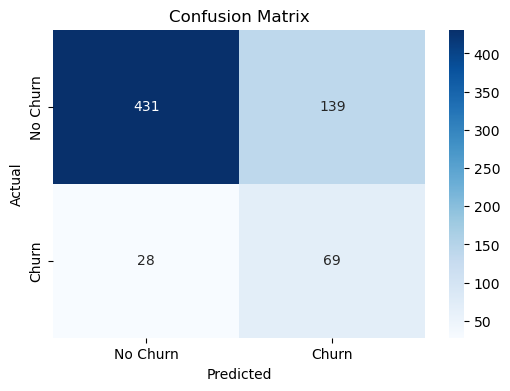

In [108]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 6.3 DecisionTreeClassifier with all features

Our Logistic regression model with all features did not improve.This might be because logistic regression may not fully capture nonlinear patterns in our data so we try a DecisionTreeClassifier.  

Overfitting was detected: The Random Forest captures patterns in the training data too closely, including noise, which reduces generalization. Large gap between train and test ROC-AUC shows from 0.991 to 0.896 which is prove for overfitting.After including a 'ccp_alpha': 0.0822770800193284 to our decision tree the model has improved and stopped Overfitting which show it's learning.

In [120]:
# check for overfitting 
# Train predictions
y_train_pred = grid_search.predict(X_train)
y_train_prob = grid_search.predict_proba(X_train)[:,1]

# Test predictions
y_test_pred = grid_search.predict(X_test)
y_test_prob = grid_search.predict_proba(X_test)[:,1]

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("Train ROC-AUC:", roc_auc_score(y_train, y_train_prob))
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_prob))

Train Accuracy: 0.8752678954136305
Test Accuracy: 0.855
Train ROC-AUC: 0.8875346650650294
Test ROC-AUC: 0.8664851784634


In [119]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC-AUC:",roc_auc_score(y_test, y_proba_dt))

print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.855
Precision: 0.5
Recall: 0.8344827586206897
F1 Score: 0.6253229974160207
ROC-AUC: 0.8664851784634

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       855
           1       0.50      0.83      0.63       145

    accuracy                           0.85      1000
   macro avg       0.73      0.85      0.77      1000
weighted avg       0.90      0.85      0.87      1000



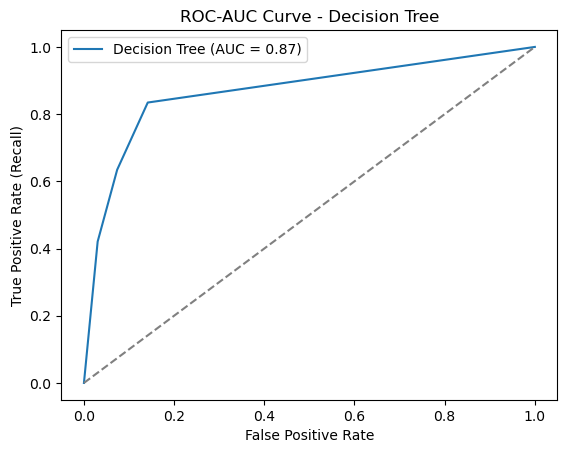

In [121]:
# Plot ROC curve
#roc_auc = roc_auc_score(y_test, y_proba)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
# Compute AUC score
roc_auc_tr = roc_auc_score(y_test, y_proba_dt)

plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_tr:.2f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC-AUC Curve - Decision Tree")
plt.legend()
plt.show()

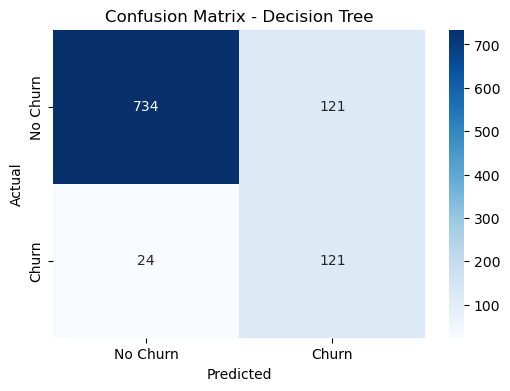

In [122]:
y_pred = grid_search.predict(X_test)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

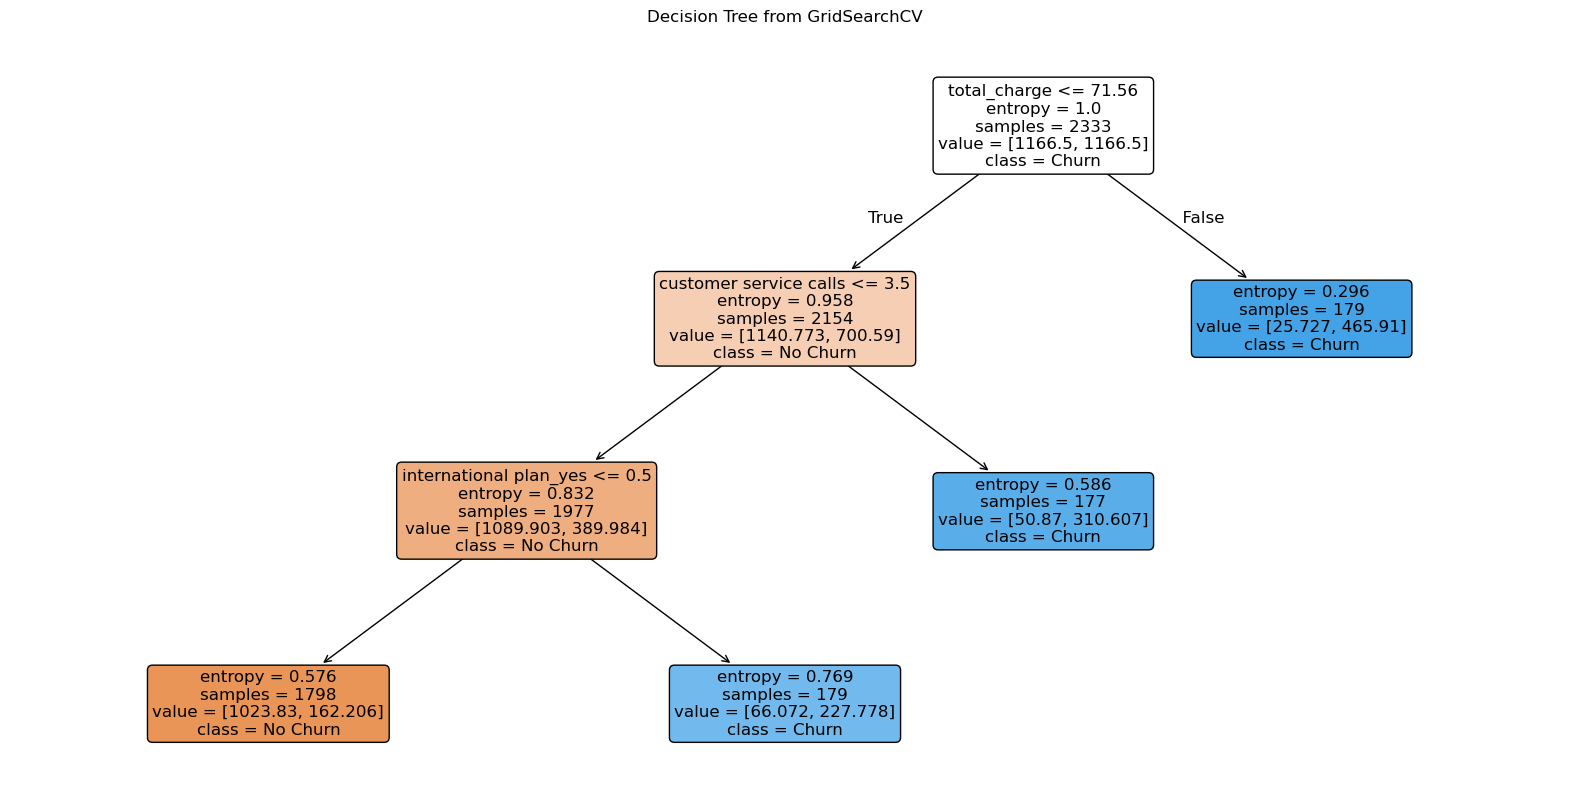

In [123]:
from sklearn import tree
# Get the best estimator from grid search
best_dt = grid_search.best_estimator_

# Plot the tree
plt.figure(figsize=(20,10))
tree.plot_tree(
    best_dt, 
    feature_names=X_train.columns,    # Names of your features
    class_names=["No Churn", "Churn"],  # Target classes
    filled=True,                      # Color nodes by class
    rounded=True,                     # Rounded boxes
    fontsize=12
)
plt.title("Decision Tree from GridSearchCV")
plt.show()

The Decision Tree is performing much better across all metrics than the baseline logistic regression.

**Recall**: Slightly improved from 0.753 to 0.808 meaning the tree catches more actual churners.

**ROC-AUC**: Higher AUC of 0.90 means the tree has a much better ability to discriminate churners from non-churners overall

The Decision Tree clearly outperforms the baseline logistic regression on this dataset.

In [124]:
# Feature importances
feat_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feat_importance)

                   Feature  Importance
11            total_charge    0.396207
7   international plan_yes    0.302360
6   customer service calls    0.301433
0           account length    0.000000
1                area code    0.000000
2    number vmail messages    0.000000
3       total intl minutes    0.000000
4         total intl calls    0.000000
5        total intl charge    0.000000
8       log_vmail_messages    0.000000
9            total_minutes    0.000000
10             total_calls    0.000000
12           state_encoded    0.000000


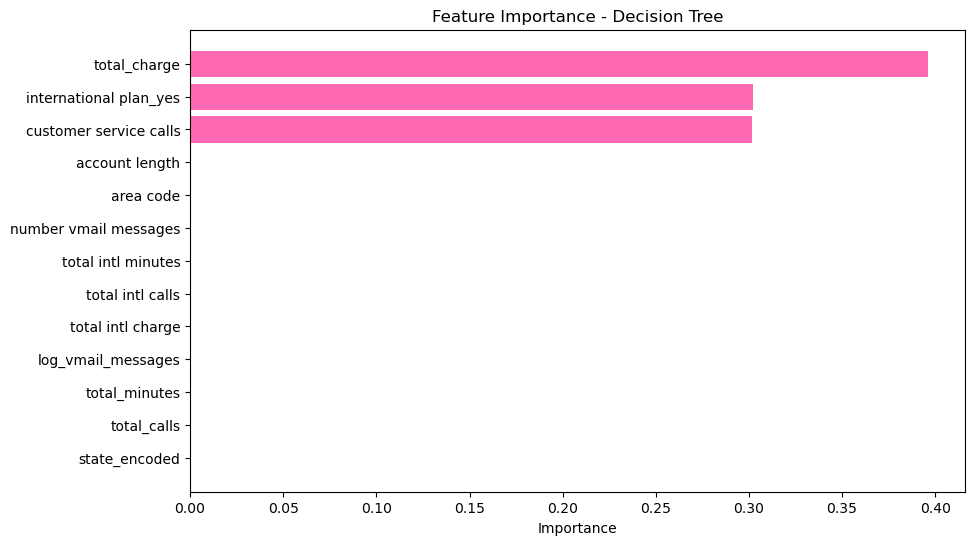

In [126]:
# Plot top features
plt.figure(figsize=(10,6))
plt.barh(feat_importance["Feature"], feat_importance["Importance"], color="hotpink")
plt.gca().invert_yaxis()  # largest on top
plt.xlabel("Importance")
plt.title("Feature Importance - Decision Tree")
plt.show()

**top 3 features** 

`total_charge` at a coefficient of (0.396) is strongest predictor of churn this can be intepreted as higher charges may indicate higher risk or dissatisfaction.

`customer service calls`(0.301) Number of calls to customer service strongly signals churn this might be a likelihood of more complaints.

`international plan_yes`(0.302) Having an international plan contributes significantly to predicting churn this might be perhaps because of cost concerns.

## 6.4 Random forest with all features

Let's take a look at how our Random Forest model worked compared to the others.

In [133]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.963
Precision: 0.9285714285714286
Recall: 0.8068965517241379
F1-score: 0.8634686346863468
ROC-AUC: 0.9175720911474088

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       855
           1       0.93      0.81      0.86       145

    accuracy                           0.96      1000
   macro avg       0.95      0.90      0.92      1000
weighted avg       0.96      0.96      0.96      1000



Random Forest outperforms both the baseline logistic regression and the Decision Tree in accuracy, precision, F1-score, and ROC-AUC.

**Recall** is the ability to detect actual churners and is slightly lower than the tuned Decision Tree (0.807 vs 0.814), but the precision and overall F1 improved significantly, meaning fewer false positives.

**ROC-AUC** Random Forest has the highest ROC-AUC (0.924), indicating it discriminates churners from non-churners better than the other models.

Random Forest gives the best overall performance on this dataset.


Tuning the probability threshold is the most common way to adjust the trade-off between precision and recall, especially in imbalanced datasets like churn prediction.we want to have a high recall which ensures we catch all churners but we will have to pay the price of false alarms which is a trade off we are willing to make.

In [134]:
thresholds = np.arange(0.1, 1.0, 0.05)
for t in thresholds:
    y_pred_t = (y_proba_rf > t).astype(int)
    print(f"Threshold: {t:.2f} | Precision: {precision_score(y_test, y_pred_t):.2f} | Recall: {recall_score(y_test, y_pred_t):.2f} | F1: {f1_score(y_test, y_pred_t):.2f}")


Threshold: 0.10 | Precision: 0.14 | Recall: 1.00 | F1: 0.25
Threshold: 0.15 | Precision: 0.15 | Recall: 1.00 | F1: 0.26
Threshold: 0.20 | Precision: 0.18 | Recall: 0.95 | F1: 0.30
Threshold: 0.25 | Precision: 0.33 | Recall: 0.92 | F1: 0.48
Threshold: 0.30 | Precision: 0.43 | Recall: 0.86 | F1: 0.57
Threshold: 0.35 | Precision: 0.57 | Recall: 0.85 | F1: 0.68
Threshold: 0.40 | Precision: 0.65 | Recall: 0.84 | F1: 0.73
Threshold: 0.45 | Precision: 0.86 | Recall: 0.83 | F1: 0.84
Threshold: 0.50 | Precision: 0.93 | Recall: 0.81 | F1: 0.86
Threshold: 0.55 | Precision: 0.93 | Recall: 0.79 | F1: 0.85
Threshold: 0.60 | Precision: 0.97 | Recall: 0.77 | F1: 0.85
Threshold: 0.65 | Precision: 0.96 | Recall: 0.68 | F1: 0.79
Threshold: 0.70 | Precision: 0.95 | Recall: 0.54 | F1: 0.69
Threshold: 0.75 | Precision: 0.96 | Recall: 0.46 | F1: 0.62
Threshold: 0.80 | Precision: 0.98 | Recall: 0.34 | F1: 0.51
Threshold: 0.85 | Precision: 0.97 | Recall: 0.26 | F1: 0.40
Threshold: 0.90 | Precision: 1.00 | Reca

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [135]:
best_threshold = 0.35  # example from tuning
y_pred_final = (y_proba_rf > best_threshold).astype(int)


In [136]:
# Metrics
print("Recall:", recall_score(y_test, y_pred_final))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

Recall: 0.8482758620689655
ROC-AUC: 0.9175720911474088


Let's compare the models ROC-AUC and Recall across the models.

Our model correctly identifies 84.8% of the actual churners.A high recall will ensure we catch more churners and this important in churn prediction because missing churners (false negatives) can lead to lost revenue.ROC-AUC measures the model’s ability to discriminate between churners and non-churners across all possible thresholds. Our score of 0.917 indicates that if you randomly pick a churner and a non-churner, the model assigns a higher probability of churn to the churner 91.7% of the time.
We can conclude that This model is very good at separating churners from non-churners compared to our baseline model and other models too.

Let's visualize our random forest model ROC-AUC Curve.

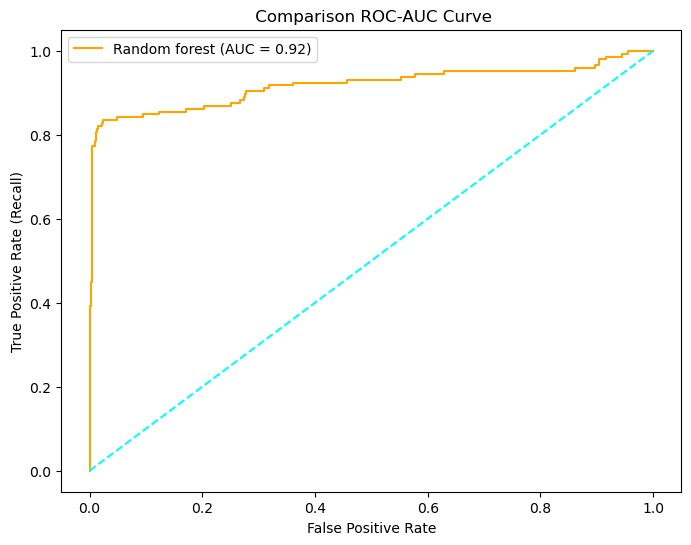

In [137]:
#plot ROC curve 
fpr_rf , tpr_rf , thresholds = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_rf ,tpr_rf, label =f"Random forest (AUC = {roc_auc_rf:.2f})",color = "orange")
plt.plot([0,1],[0,1],'--',color='cyan')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title(" Comparison ROC-AUC Curve")
plt.legend()
plt.show()

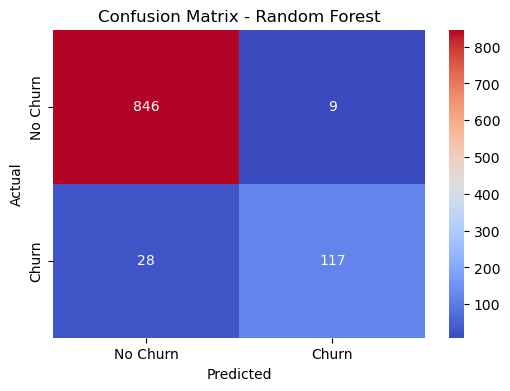

In [138]:
y_pred = best_rf.predict(X_test)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.savefig("confusion matrix.png", dpi=300, bbox_inches='tight')
plt.show()

**Interpeted**

**True Negatives** (TN) = 846

Customers who did not churn and were correctly predicted as No Churn.

**False Positives**(FP) = 9

Customers who did not churn but were incorrectly predicted as Churn.

**False Negatives** (FN) = 28

Customers who churned but were incorrectly predicted as No Churn.

**True Positive** (TP) = 117

Customers who churned and were correctly predicted as Churn.

In [139]:
# Feature importances
feat_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_rf.feature_importances_  # from your fitted GridSearchCV best model
}).sort_values(by="Importance", ascending=False)
print(feat_importance)

                   Feature  Importance
11            total_charge    0.305052
6   customer service calls    0.195764
9            total_minutes    0.142451
7   international plan_yes    0.134658
8       log_vmail_messages    0.039229
2    number vmail messages    0.037308
5        total intl charge    0.035482
4         total intl calls    0.030410
3       total intl minutes    0.026393
10             total_calls    0.017660
0           account length    0.016625
12           state_encoded    0.015303
1                area code    0.003666


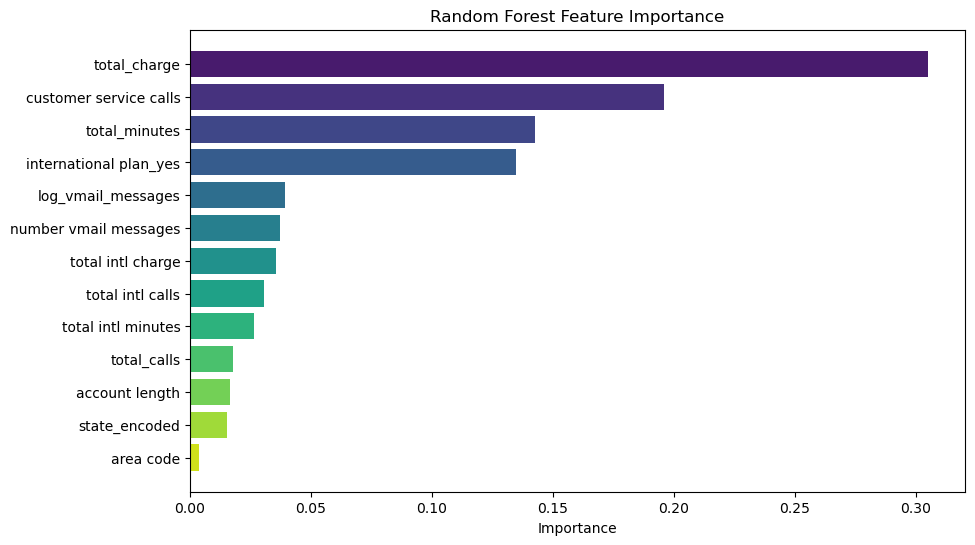

In [140]:
palette = sns.color_palette("viridis", len(feat_importance))
# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_importance["Feature"], feat_importance["Importance"], color=palette)
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

## HOW FEATURES INFLUENCING CHURN
This are the features that increase rate of churning in the model we seek to deploy:

**total charge** Customers with higher total charges are more likely to churn.High spending may indicate dissatisfaction with value or plan costs.

**customer service calls** Frequent calls to customer service strongly predict churn. Likely reflects unresolved issues or poor service experience.

**total_minute** Customers with higher total minutes usage may be at risk; possibly they are testing services or comparing alternatives.

**international plan** Having an international plan increases churn risk. Possibly due to cost or underuse of the plan.

**area code** Area code does not influence churn prediction.

**state** Geographic location contributes very little.

## **NOTE :**

Based on our evaluation, the Random Forest model achieves the best balance of high recall (0.85) and ROC-AUC (0.92) with minimal overfitting, making it the most suitable model for deployment in predicting customer churn.

# 7.CONCLUSION
1. New Jersey (NJ) and California (CA) are the states with the highest churning rate at 26.5% churn rate.
2. Hawaii (HI) and Alaska (AK) have the most loyal customers with a low rate of 5.7% and 5.8%  churn rate respectively.
3. The best performing model has a recall of 84.5% and an ROC-AUC score of 91.7% .
4. High charges is the highest feature influencing churn at 0.305
5. Random Forest model is because it achieves the best balance of high recall (0.85) and ROC-AUC (0.92) with minimal overfitting.
6. Random forest model predicted a total of 963 out 1000 correctly .

# 8. RECCOMENDATIONS
1. Stakeholders should focus on states with highest churn NJ(New jersey) and CA(Carlifonia) with special offers, loyalty programs, or improved customer service inorder to retain the customers.
2. High charges, frequent customer service calls and international plans are the key factors driving churn. By targeting retention efforts to these customers, the company can maximize revenue retention.
3. Stakeholders should de-priotize  Voicemail usage, account length, state, and area code because they have minimal predictive value when working on interventions.
4. Stakeholders should investigate complaints or service issues in high-churn states to reduce dissatisfaction and also pay attention to areas that are reported by customer complaints to increase customer satisfaction .
5. Stakeholders should relocate resources to higher-risk states such as New Jersey, California ,Texas among others since churn is low in those states and replicate strategies used in those states to improve others.